![title banner](../banners/start_banner.png)

# Topic : Dealing with Missing Data

This notebook provides sample code to give an idea of how to identify missing data and deal with it.

**Dataset used :** https://www.kaggle.com/gpreda/covid-world-vaccination-progress

**Further references:**
- https://github.com/ResidentMario/missingno
- https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python 

In [1]:
import pandas as pd 
import missingno as msno
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../test_datasets/country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


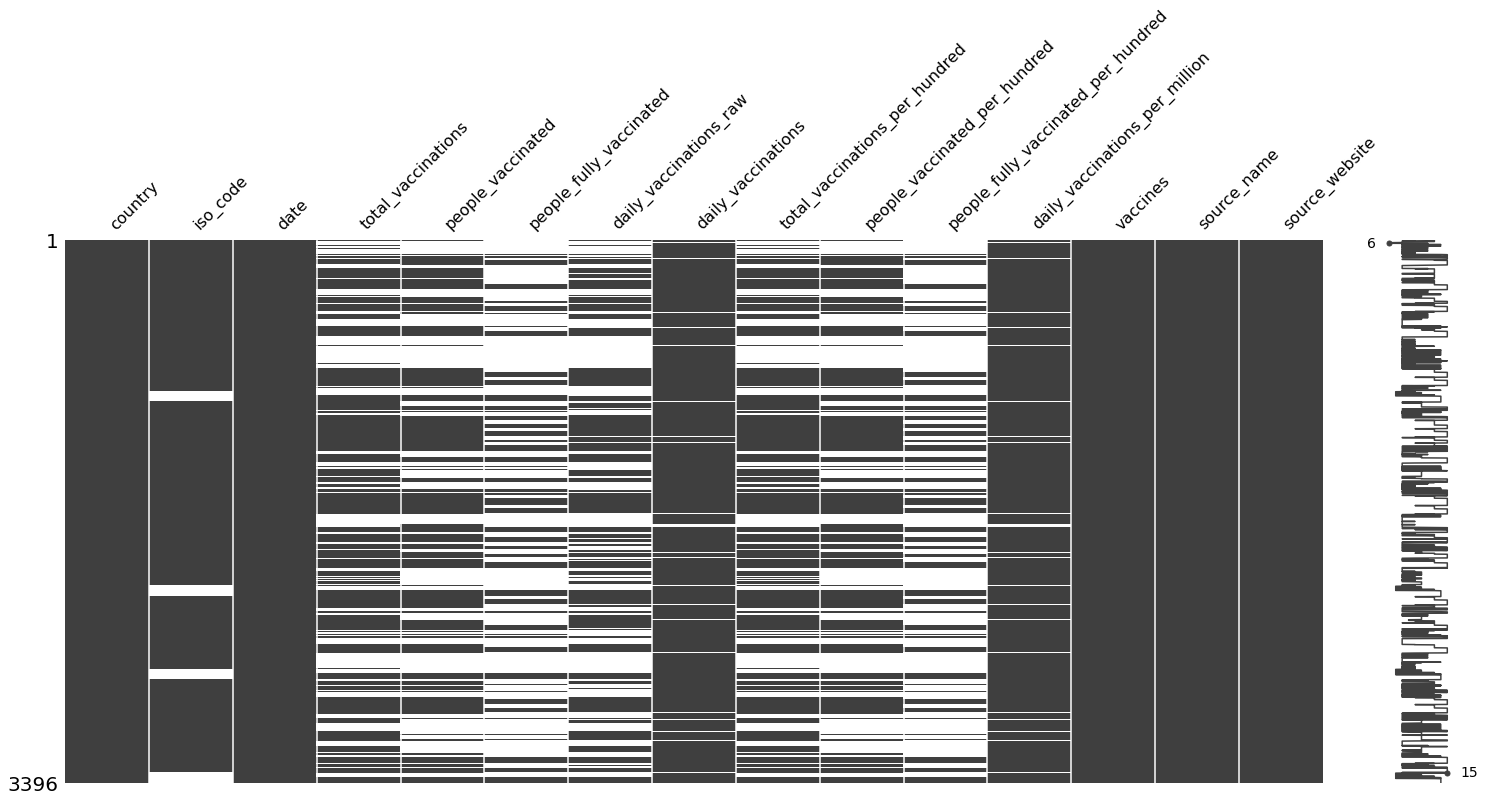

In [3]:
# visualize missing values per column

msno.matrix(df)
plt.show()

- Whitespace indicates missing values

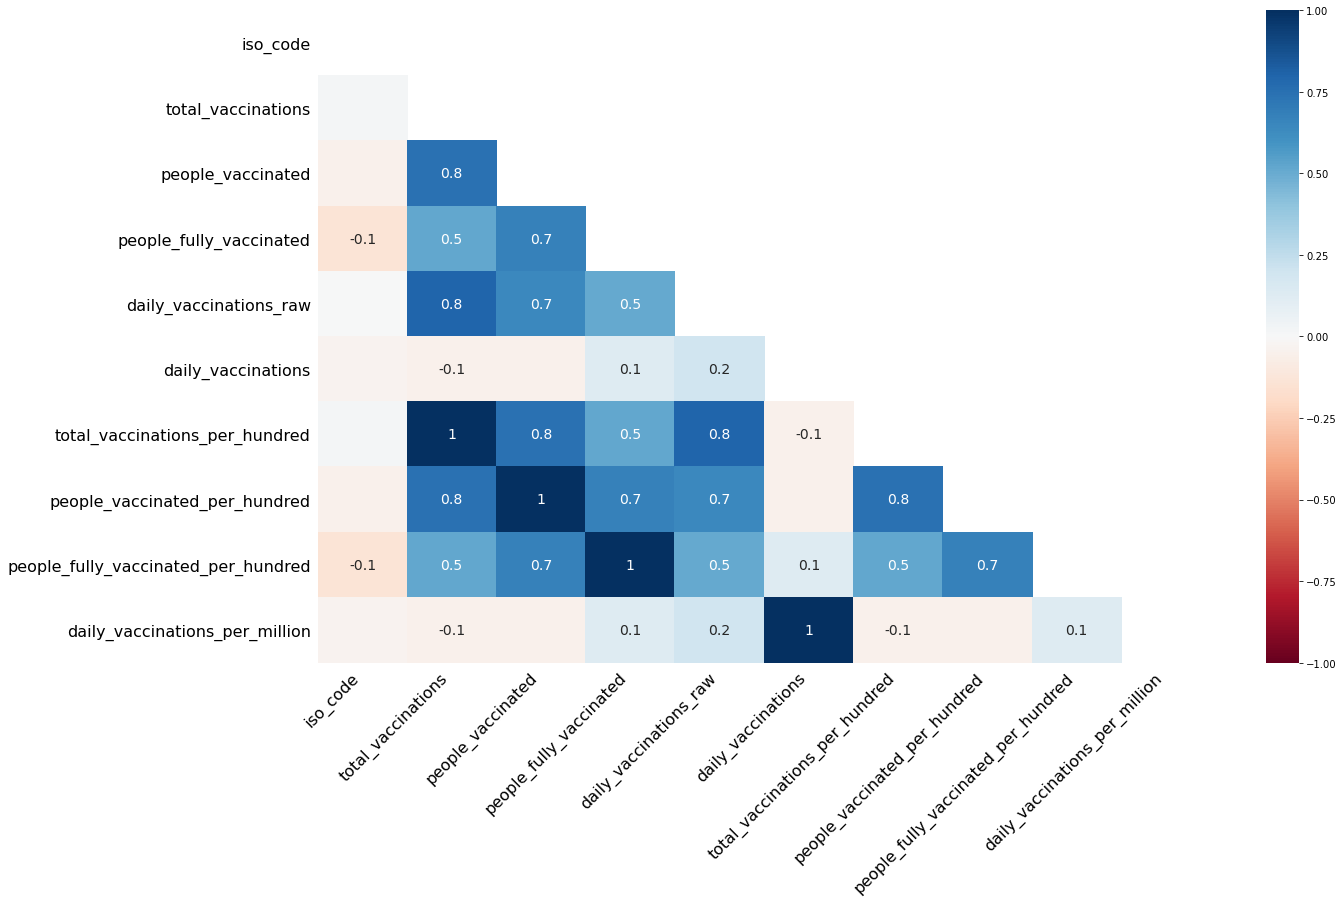

In [4]:
# check nullity correlation

msno.heatmap(df)
plt.show()

- A high nullity correlation(i.e closer to +1 (positive) or -1 (negative)) between F1 and F2 indicates that F1 and F2's presence is interlinked.
    - -1 : If F1 is present, F2 is absent
    - +1 : If F1 is present, F2 is present

### Dealing with missing values

In [5]:
df.shape

(3396, 15)

In [6]:
# option 1: remove features with lots of missing values
t = df.dropna(axis=1, thresh=70)
t.shape

(3396, 15)

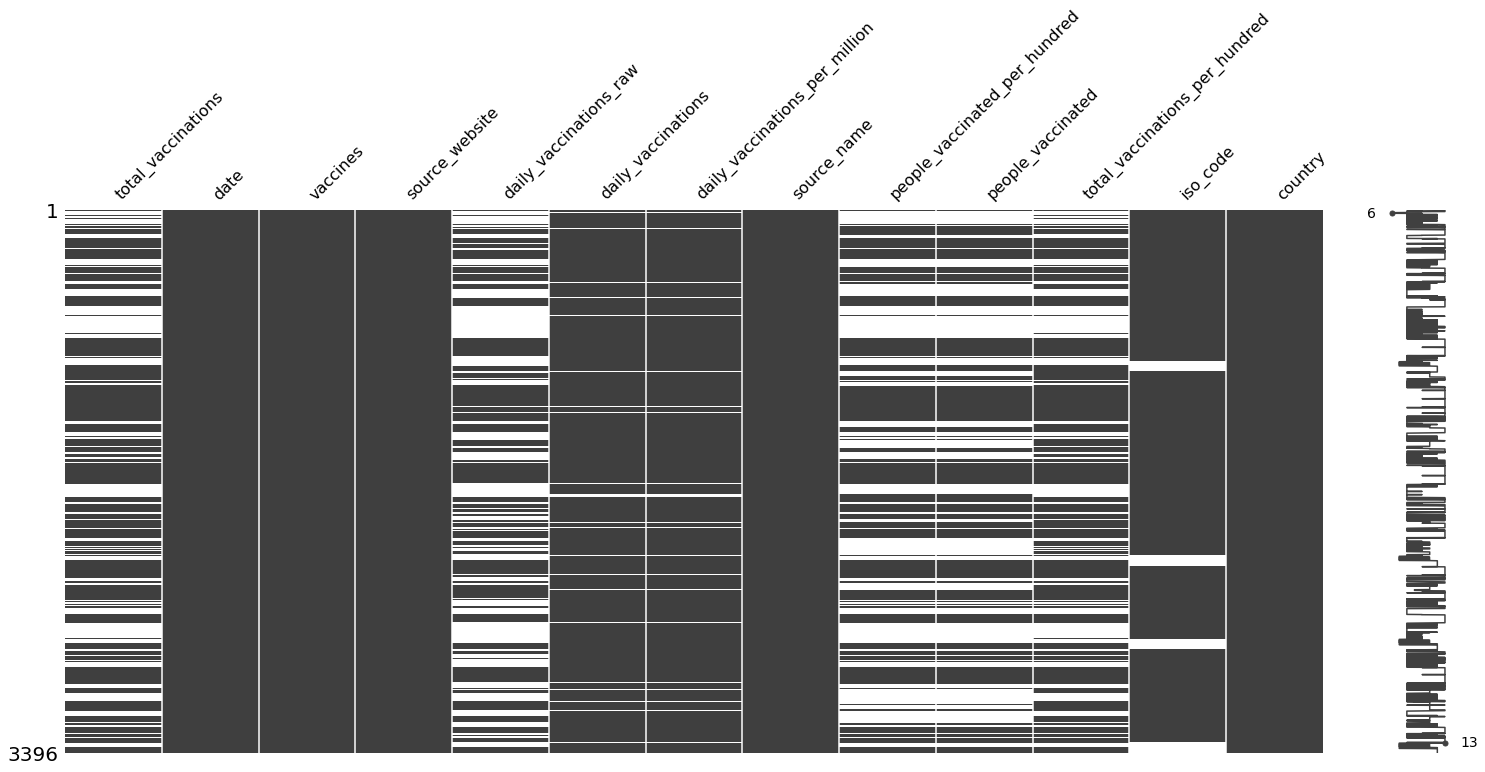

In [7]:
# option 1: remove features with lots of missing values

def rem_features(df, thresh = 70.0):
    """ Remove features from dataframe where missing value
    percentage is more than thresh"""

    mvp = ((df.isnull().sum()) / (len(df))) * 100
    return mvp[mvp > thresh]

# create retained features list
retained_features = set(df.columns) - set(rem_features(df, 50.0).index)
op1 = df[retained_features]
msno.matrix(op1)
plt.show()

- 2 features have been removed (which ones?)

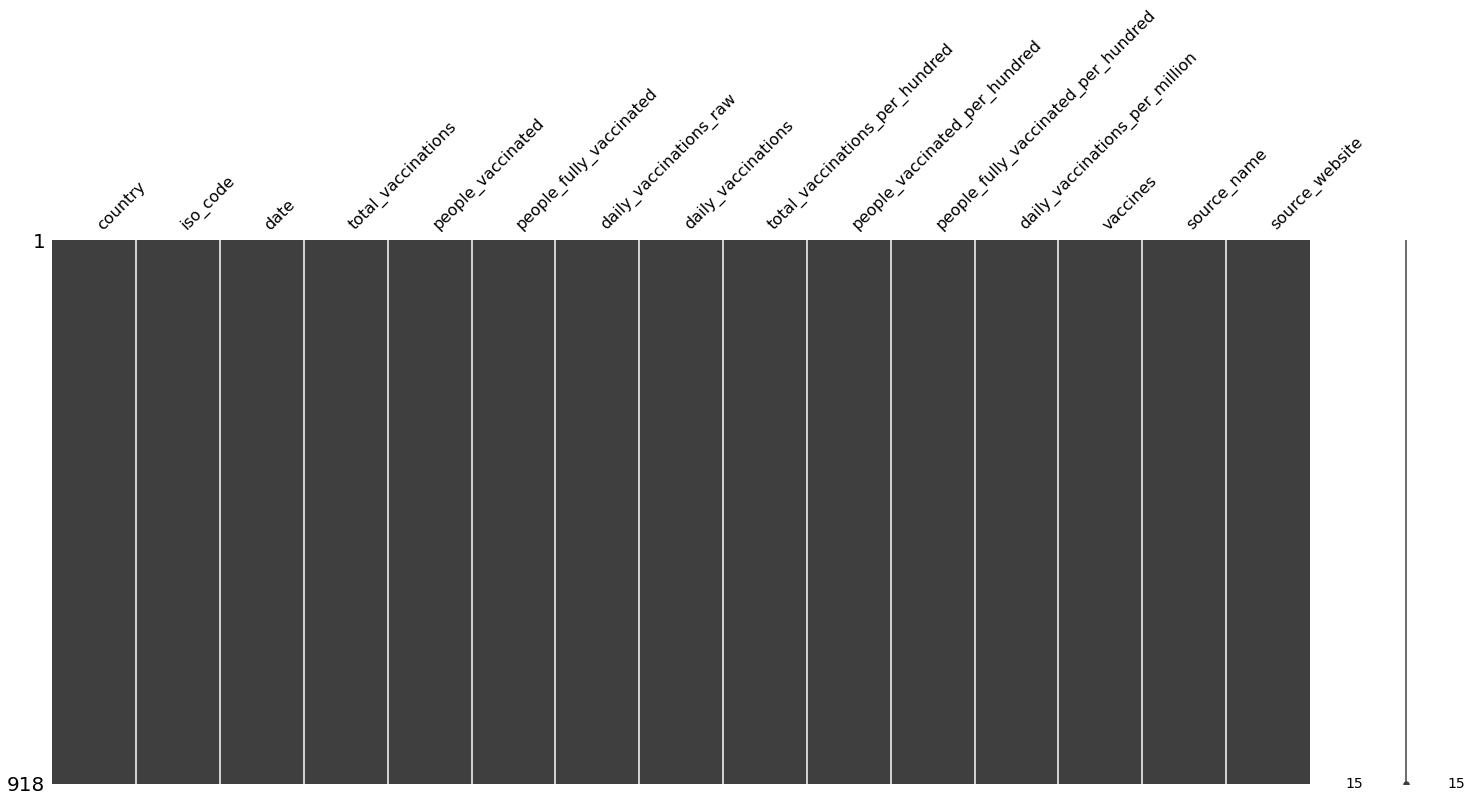

In [8]:
# option 2: remove observations with missing values

op2 = df.dropna()
msno.matrix(op2)
plt.show()

- No missing values
- But, **huge loss of data**! This can be a problem. So, essentially dealing with missing values in its most basic sense is a tradeoff problem between missingness and quantity of data

Another option to deal with missing values is imputation or *filling in missing values with some data*. Go through the further references links to learn more about this.

![end banner](../banners/finish_banner.png)